# New restaurant and Reviewing Neighbourhood in Oslo:

## Introduction:

     I am planning to open a new restaurant in Oslo city. Oslo is the capital city of Norway with an estimated population of 1.71 million in 2020. Oslo is a multicultural city and many other people who came from different countries have added to its diversity. Different people have different cultures and their preferences for food vary accordingly. There are many restaurants offering various types of cuisines in Oslo. The most common are Italian, Mexican, Turkish, Pakistani and Indian. The aim of this project is to study the neighbourhoods in Oslo to determine possible locations for opening a restaurant. I am looking for an investor to support my venture and to convince her or him I must analyse the neighbourhoods where there are too few cafes and restaurants.



###### Before we get the data and start exploring it, Import essential libraries

In [207]:

!pip install geopy
!pip install geocoder
!pip install folium

import numpy as np
import pandas as pd
import json
from geopy.geocoders import Nominatim
import geocoder
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize
from sklearn.metrics import silhouette_score

%matplotlib notebook

print('All libraries imported.')

All libraries imported.


## Description of the Data:
    
     Location and population are the two key factors which will help to analyse different scenarios for finalized the location of the restaurant. In this regard the data required for this project has been collected from different sources. I will get the basic information for all the neighbourhoods in the city from Wikipedia. By using foursquare API, I will explore different types of existing cafes and restaurants in different neighbourhoods.

# Sources of the Data:
Data Extraction from https://en.wikipedia.org/wiki/List_of_boroughs_of_Oslo 


In [208]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_boroughs_of_Oslo')[-1]
df.rename(columns={'Area': 'Neighborhood'}, inplace=True)
df.head()

,Borough,Residents,Neighborhood,Number
0,Alna,49 801,"13,7 km2",12
1,Bjerke,33 422,"7,7 km2",9
2,Frogner,59 269,"8,3 km2",5
3,Gamle Oslo,58 671,"7,5 km2",1
4,Grorud,27 707,"8,2 km2",10


In [209]:
df

,Borough,Residents,Neighborhood,Number
0,Alna,49 801,"13,7 km2",12
1,Bjerke,33 422,"7,7 km2",9
2,Frogner,59 269,"8,3 km2",5
3,Gamle Oslo,58 671,"7,5 km2",1
4,Grorud,27 707,"8,2 km2",10
5,Grünerløkka,62 423,"4,8 km2",2
6,Nordre Aker,52 327,"13,6 km2",8
7,Nordstrand,52 459,"16,9 km2",14
8,Sagene,45 089,"3,1 km2",3
9,St. Hanshaugen,38 945,"3,6 km2",4


###### Now obtain Latitude and Longitude of Oslo in the Data Frame:

In [210]:
df['Latitude1'] = None
df['Longitude1'] = None

for i, neigh in enumerate(df['Borough']):
    lat_lng_coords = None
    
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Oslo, Norway'.format(neigh))
        lat_lng_coords = g.latlng
    
    if lat_lng_coords:
        latitude = lat_lng_coords[0]
        longitude = lat_lng_coords[1]
    
    df.loc[i, 'Latitude'] = latitude
    df.loc[i, 'Longitude'] = longitude

df.head(10)

,Borough,Residents,Neighborhood,Number,Latitude1,Longitude1,Latitude,Longitude
0,Alna,49 801,"13,7 km2",12,None,None,59.92680,10.84570
1,Bjerke,33 422,"7,7 km2",9,None,None,59.94221,10.81183
2,Frogner,59 269,"8,3 km2",5,None,None,59.91886,10.70239
3,Gamle Oslo,58 671,"7,5 km2",1,None,None,59.90624,10.77147
4,Grorud,27 707,"8,2 km2",10,None,None,59.96058,10.88492
5,Grünerløkka,62 423,"4,8 km2",2,None,None,59.92433,10.76119
6,Nordre Aker,52 327,"13,6 km2",8,None,None,59.94933,10.73140
7,Nordstrand,52 459,"16,9 km2",14,None,None,59.86075,10.80260
8,Sagene,45 089,"3,1 km2",3,None,None,59.93868,10.75763
9,St. Hanshaugen,38 945,"3,6 km2",4,None,None,59.92679,10.74111


###### By using Drop Method, I drop some columns

In [211]:
df.drop(['Latitude1', 'Longitude1'], axis=1, inplace=True)
df.head(10)

,Borough,Residents,Neighborhood,Number,Latitude,Longitude
0,Alna,49 801,"13,7 km2",12,59.92680,10.84570
1,Bjerke,33 422,"7,7 km2",9,59.94221,10.81183
2,Frogner,59 269,"8,3 km2",5,59.91886,10.70239
3,Gamle Oslo,58 671,"7,5 km2",1,59.90624,10.77147
4,Grorud,27 707,"8,2 km2",10,59.96058,10.88492
5,Grünerløkka,62 423,"4,8 km2",2,59.92433,10.76119
6,Nordre Aker,52 327,"13,6 km2",8,59.94933,10.73140
7,Nordstrand,52 459,"16,9 km2",14,59.86075,10.80260
8,Sagene,45 089,"3,1 km2",3,59.93868,10.75763
9,St. Hanshaugen,38 945,"3,6 km2",4,59.92679,10.74111


# Methodology section:

The data will be read into a pandas data frame using the read_html () method. I will use different types of data visualisation techniques to explore neighbourhoods and analyse different coordinates (latitude, longitude) for different locations. Juxtaposing this information and leveraging the data will give us a solid comparison of various neighbourhoods in order for us to obtain an answer to the problem defined above: to determine which location is the most suitable for restaurant. 

The Foursquare API gives us access to a large amount of local restaurants and coffee shop data. I’ll be exploring how the Foursquare API can be used to assess the various venues in an area. Furthermore, the development of new restaurants in an area also says a lot about the type of area.?

At the end, clustering the neighborhoods and use KMeans clustering method to cluster the neighborhoods.

## Data Visualization:

Visualize the neighborhoods on a map using Folium. First get the geographical coordinates of Oslo using GeoPy.

In [212]:
address = 'Oslo City'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Oslo City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Oslo City are 59.9126779, 10.752390401865883.


###### Create a map of Oslo with neighborhoods

In [213]:
oslo_map = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(oslo_map)
    
    latitudes = list(df['Latitude'])
    longitudes = list(df['Longitude'])
    labels = list(df['Borough'])

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(oslo_map)    
    
oslo_map

In [214]:
oslo_map = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(oslo_map)
    
oslo_map

#### Foursquare API

Define Foursquare Credentials and Version

In [215]:
CLIENT_ID = 'E3UOVOH1S1HFNQPHH1OJFTGV01KGJU0WSONAICYLVOSI1ARY' # your Foursquare ID
CLIENT_SECRET = 'JL4553L3IAQJAPVMLRQYT4DZPO3V5LJNE20PUQ3NB1HBYGTQ' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: E3UOVOH1S1HFNQPHH1OJFTGV01KGJU0WSONAICYLVOSI1ARY
CLIENT_SECRET:JL4553L3IAQJAPVMLRQYT4DZPO3V5LJNE20PUQ3NB1HBYGTQ


###### Explore first neighborhood(Latitude, Longitude)in our dataframe using Foursquare API.

In [216]:
df.loc[0, 'Borough']

'Alna'

In [217]:
neighborhood_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df.loc[0, 'Borough'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Alna are 59.92680000000007, 10.845700000000022.


###### Then get the top 1000 venues with a radius of 5000m or 5km. 

In [218]:
LIMIT = 1000 # limit of number of venues returned by Foursquare API

radius = 5000 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [219]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fb38b0ec656a10ca6458b2c'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Oslo',
  'headerFullLocation': 'Oslo',
  'headerLocationGranularity': 'city',
  'totalResults': 179,
  'suggestedBounds': {'ne': {'lat': 59.971800045000116,
    'lng': 10.935333777957222},
   'sw': {'lat': 59.88179995500003, 'lng': 10.756066222042822}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bf7d2408d30d13ac48cff17',
       'name': 'Skeidar',
       'location': {'address': 'Strømsveien 245',
        'lat': 59.92548691649902,
        'lng': 10.846882991027087,
        'labeledLatLngs': [{'label': 'display',
          'lat': 59.92548691649902,
          'lng': 10

###### Convert the data into a pandas dataframe

In [220]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [221]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

C:\Users\Ali Basim\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Skeidar,Furniture / Home Store,59.925487,10.846883
1,Vinmonopolet (Alnabru),Wine Shop,59.925580,10.847860
2,SATS,Gym / Fitness Center,59.943087,10.835261
3,SATS,Gym / Fitness Center,59.916591,10.848330
4,Radisson Blu Hotel Alna,Hotel,59.930266,10.868274


In [222]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


##### Explore Boroughs  in Oslo

In [223]:
def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
          # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [224]:
nearby_venues = getNearbyVenues(names=df['Borough'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Alna
Bjerke
Frogner
Gamle Oslo
Grorud
Grünerløkka
Nordre Aker
Nordstrand
Sagene
St. Hanshaugen
Stovner
Søndre Nordstrand
Ullern
Vestre Aker
Østensjø


###### Create a new dataframe called nearby_venues.

In [225]:
print(nearby_venues.shape)
nearby_venues.head()

(1339, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alna,59.9268,10.8457,Skeidar,59.925487,10.846883,Furniture / Home Store
1,Alna,59.9268,10.8457,Vinmonopolet (Alnabru),59.925580,10.847860,Wine Shop
2,Alna,59.9268,10.8457,SATS,59.943087,10.835261,Gym / Fitness Center
3,Alna,59.9268,10.8457,SATS,59.916591,10.848330,Gym / Fitness Center
4,Alna,59.9268,10.8457,Radisson Blu Hotel Alna,59.930266,10.868274,Hotel


In [226]:
nearby_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Alna,100,100,100,100,100,100
Bjerke,100,100,100,100,100,100
Frogner,100,100,100,100,100,100
Gamle Oslo,100,100,100,100,100,100
Grorud,74,74,74,74,74,74
Grünerløkka,100,100,100,100,100,100
Nordre Aker,100,100,100,100,100,100
Nordstrand,54,54,54,54,54,54
Sagene,100,100,100,100,100,100


In [227]:
print('There are {} uniques categories.'.format(len(nearby_venues['Venue Category'].unique())))

There are 141 uniques categories.


## Analyze Each Neighborhood

Analyzing each neighborhood by One-hot Encoding

In [228]:
# one hot encoding
oslo_onehot = pd.get_dummies(nearby_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
oslo_onehot['Neighborhood'] = nearby_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [oslo_onehot.columns[-1]] + list(oslo_onehot.columns[:-1])
oslo_onehot = oslo_onehot[fixed_columns]

oslo_onehot.head()

,Neighborhood,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bakery,...,Toy / Game Store,Track,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Waterfront,Wine Bar,Wine Shop,Yoga Studio
0,Alna,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Alna,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,Alna,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Alna,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Alna,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [229]:
oslo_onehot = pd.get_dummies(nearby_venues[['Venue Category']], prefix="", prefix_sep="")
oslo_onehot.head()

,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bakery,Bar,...,Toy / Game Store,Track,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Waterfront,Wine Bar,Wine Shop,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###### Add Neighborhood column in the dataframe.

In [230]:
oslo_onehot['Neighborhood'] = nearby_venues['Neighborhood']
oslo_onehot.head()

,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bakery,Bar,...,Track,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Waterfront,Wine Bar,Wine Shop,Yoga Studio,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Alna
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Alna
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Alna
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Alna
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Alna


###### Moving the Neighborhood column to the first column.

In [231]:
temp = list(oslo_onehot.columns)

if 'Neighborhood' in temp:
    temp.remove('Neighborhood')
    
fixed_columns = ['Neighborhood'] + temp
oslo_onehot = oslo_onehot[fixed_columns]

oslo_onehot.head()

,Neighborhood,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bakery,...,Toy / Game Store,Track,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Waterfront,Wine Bar,Wine Shop,Yoga Studio
0,Alna,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Alna,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,Alna,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Alna,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Alna,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###### Make group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [232]:
oslo_grouped = oslo_onehot.groupby('Neighborhood').mean().reset_index()
oslo_grouped

,Neighborhood,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bakery,...,Toy / Game Store,Track,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Waterfront,Wine Bar,Wine Shop,Yoga Studio
0,Alna,0.00,0.01,0.010000,0.000000,0.030000,0.000000,0.000000,0.01,0.030000,...,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.01,0.030000,0.01
1,Bjerke,0.00,0.00,0.000000,0.000000,0.010000,0.000000,0.000000,0.01,0.050000,...,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.01,0.030000,0.01
2,Frogner,0.02,0.01,0.000000,0.000000,0.010000,0.000000,0.000000,0.00,0.050000,...,0.01,0.000000,0.000000,0.000000,0.01,0.00,0.01,0.00,0.030000,0.01
3,Gamle Oslo,0.00,0.00,0.000000,0.000000,0.010000,0.000000,0.000000,0.01,0.020000,...,0.00,0.000000,0.000000,0.000000,0.01,0.00,0.00,0.01,0.010000,0.01
4,Grorud,0.00,0.00,0.013514,0.000000,0.013514,0.013514,0.013514,0.00,0.013514,...,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.013514,0.00
5,Grünerløkka,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.02,0.030000,...,0.00,0.000000,0.000000,0.000000,0.01,0.00,0.00,0.01,0.010000,0.01
6,Nordre Aker,0.00,0.01,0.000000,0.000000,0.010000,0.000000,0.000000,0.01,0.050000,...,0.00,0.000000,0.000000,0.000000,0.01,0.00,0.00,0.01,0.030000,0.01
7,Nordstrand,0.00,0.00,0.000000,0.000000,0.018519,0.000000,0.000000,0.00,0.018519,...,0.00,0.018519,0.018519,0.037037,0.00,0.00,0.00,0.00,0.018519,0.00
8,Sagene,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.01,0.050000,...,0.00,0.000000,0.000000,0.000000,0.01,0.00,0.00,0.01,0.020000,0.00
9,St. Hanshaugen,0.01,0.00,0.000000,0.000000,0.010000,0.000000,0.000000,0.01,0.030000,...,0.00,0.000000,0.000000,0.000000,0.01,0.00,0.00,0.01,0.010000,0.00


###### Find out the size of the oslo_grouped

In [233]:
oslo_grouped.shape

(15, 142)

###### Display the top 5 most common venues of all neighborhoods.

In [234]:
num_top_venues = 5

for hood in oslo_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = oslo_grouped[oslo_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Alna----
           venue  freq
0            Bar  0.09
1    Coffee Shop  0.09
2  Grocery Store  0.06
3           Café  0.06
4           Park  0.05


----Bjerke----
          venue  freq
0           Bar  0.11
1   Coffee Shop  0.08
2        Bakery  0.05
3          Park  0.05
4  Cocktail Bar  0.04


----Frogner----
                     venue  freq
0              Coffee Shop  0.07
1                   Bakery  0.05
2             Burger Joint  0.04
3  Scandinavian Restaurant  0.04
4                     Park  0.04


----Gamle Oslo----
          venue  freq
0           Bar  0.13
1   Coffee Shop  0.09
2  Cocktail Bar  0.04
3      Beer Bar  0.04
4  Burger Joint  0.03


----Grorud----
                    venue  freq
0           Grocery Store  0.19
1                    Lake  0.05
2  Furniture / Home Store  0.05
3                   Hotel  0.04
4               Ski Lodge  0.04


----Grünerløkka----
          venue  freq
0           Bar  0.17
1   Coffee Shop  0.08
2          Park  0.05
3  Cocktail 

###### Generate the new dataframe and show the top 10 venues for each neighborhood

In [235]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [236]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = oslo_grouped['Neighborhood']

for ind in np.arange(oslo_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(oslo_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alna,Bar,Coffee Shop,Grocery Store,Café,Pizza Place,Park,Asian Restaurant,Bakery,Wine Shop,Gym / Fitness Center
1,Bjerke,Bar,Coffee Shop,Bakery,Park,Grocery Store,Cocktail Bar,Brewery,Café,Gym / Fitness Center,Pizza Place
2,Frogner,Coffee Shop,Bakery,Gym / Fitness Center,Park,Scandinavian Restaurant,Burger Joint,Restaurant,Indian Restaurant,Wine Shop,Movie Theater
3,Gamle Oslo,Bar,Coffee Shop,Beer Bar,Cocktail Bar,Scandinavian Restaurant,Brewery,Burger Joint,Café,Indian Restaurant,Food Court
4,Grorud,Grocery Store,Lake,Furniture / Home Store,Electronics Store,Supermarket,Hotel,Café,Shopping Mall,Ski Area,Ski Lodge


###### Clustering neighborhoods

Use KMeans clustering method to cluster the neighborhoods.

In [237]:
def plot(x, y):
    fig = plt.figure(figsize=(12,6))
    plt.plot(x, y, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Scores')
    plt.title('Checking Optimum Number of Clusters')
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

In [238]:
maxk = 10
scores = []
kval = []

for k in range(2, maxk+1):
    cl_df = oslo_grouped.drop('Neighborhood', axis=1)
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=40).fit_predict(cl_df) #Choose any random_state
    
    score = silhouette_score(cl_df, kmeans, metric='euclidean', random_state=0)
    kval.append(k)
    scores.append(score)

###### Print the scores for different number of clusters and plot the data as well.

[0.3543916828859317, 0.34841352868624104, 0.3409077678613119, 0.3098157666754104, 0.23105598745149938, 0.1956727226846803, 0.165198167053146, 0.16280861740465016, 0.15969676494163085]
[2, 3, 4, 5, 6, 7, 8, 9, 10]


<IPython.core.display.Javascript object>


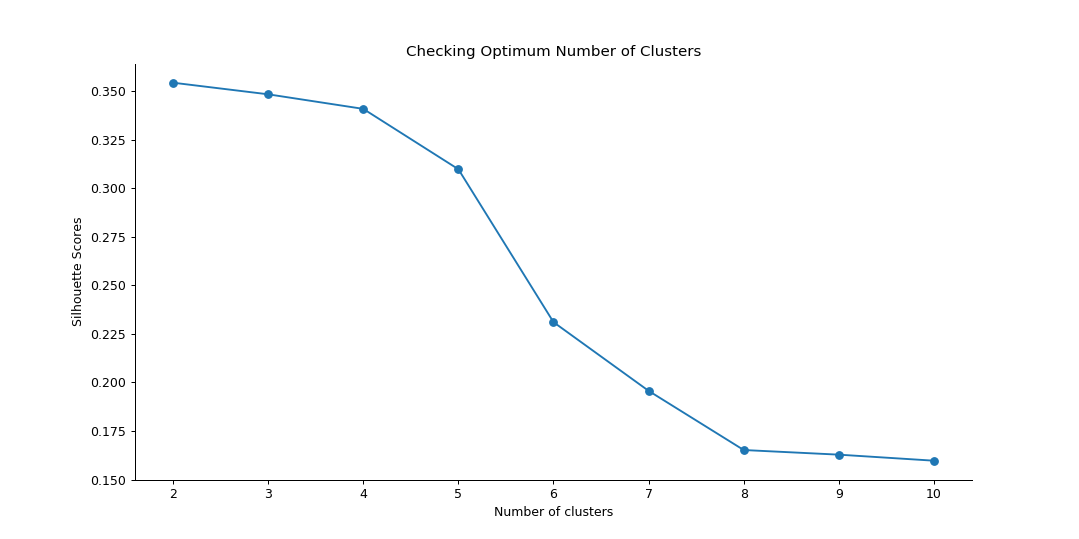

In [239]:
print(scores)
print(kval)
plot(kval, scores)

In [240]:
k = 15

oslo_clustering = oslo_grouped.drop('Neighborhood', axis=1)
kmeans = KMeans(n_clusters=k, init="k-means++", random_state=40).fit(oslo_clustering) #Can choose any random_state

kmeans.labels_

array([ 8, 13, 11,  4,  1, 12,  0,  5, 10, 14,  9,  2,  7,  3,  6])

###### Make a new dataframe that includes the cluster and the top 10 venues for each neighborhood.

In [241]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
oslo_merged = df
oslo_merged = oslo_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Borough')

In [242]:
print(oslo_merged.shape)
oslo_merged

(15, 17)


,Borough,Residents,Neighborhood,Number,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alna,49 801,"13,7 km2",12,59.92680,10.84570,8,Bar,Coffee Shop,Grocery Store,Café,Pizza Place,Park,Asian Restaurant,Bakery,Wine Shop,Gym / Fitness Center
1,Bjerke,33 422,"7,7 km2",9,59.94221,10.81183,13,Bar,Coffee Shop,Bakery,Park,Grocery Store,Cocktail Bar,Brewery,Café,Gym / Fitness Center,Pizza Place
2,Frogner,59 269,"8,3 km2",5,59.91886,10.70239,11,Coffee Shop,Bakery,Gym / Fitness Center,Park,Scandinavian Restaurant,Burger Joint,Restaurant,Indian Restaurant,Wine Shop,Movie Theater
3,Gamle Oslo,58 671,"7,5 km2",1,59.90624,10.77147,4,Bar,Coffee Shop,Beer Bar,Cocktail Bar,Scandinavian Restaurant,Brewery,Burger Joint,Café,Indian Restaurant,Food Court
4,Grorud,27 707,"8,2 km2",10,59.96058,10.88492,1,Grocery Store,Lake,Furniture / Home Store,Electronics Store,Supermarket,Hotel,Café,Shopping Mall,Ski Area,Ski Lodge
5,Grünerløkka,62 423,"4,8 km2",2,59.92433,10.76119,12,Bar,Coffee Shop,Park,Cocktail Bar,Café,Bakery,Beer Bar,Brewery,Italian Restaurant,Tapas Restaurant
6,Nordre Aker,52 327,"13,6 km2",8,59.94933,10.73140,0,Coffee Shop,Park,Bar,Bakery,Café,Gym / Fitness Center,Cocktail Bar,French Restaurant,Scandinavian Restaurant,Wine Shop
7,Nordstrand,52 459,"16,9 km2",14,59.86075,10.80260,5,Grocery Store,Beach,Sushi Restaurant,Shopping Mall,Lake,Ski Lodge,Supermarket,Train Station,Fast Food Restaurant,Café
8,Sagene,45 089,"3,1 km2",3,59.93868,10.75763,10,Bar,Coffee Shop,Park,Café,Cocktail Bar,Bakery,Beer Bar,Brewery,Burger Joint,Gym / Fitness Center
9,St. Hanshaugen,38 945,"3,6 km2",4,59.92679,10.74111,14,Coffee Shop,Bar,Café,Cocktail Bar,Park,Bakery,Beer Bar,Scandinavian Restaurant,Brewery,Gym / Fitness Center


###### Visualize the resulting clusters by making a map.

In [243]:
address = 'Oslo City'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Oslo City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Oslo City are 59.9126779, 10.752390401865883.


In [244]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(oslo_merged['Latitude'], oslo_merged['Longitude'], oslo_merged['Borough'], oslo_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

###### Examine Clusters

###### Cluster 1

In [245]:
oslo_merged.loc[oslo_merged['Cluster Labels'] == 9, oslo_merged.columns[[0] + [1] + list(range(5, oslo_merged.shape[1]))]]

,Borough,Residents,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Stovner,33 316,10.92083,9,Grocery Store,Shopping Mall,Hotel,Lake,Supermarket,Furniture / Home Store,Soccer Field,Gym / Fitness Center,Pizza Place,Convenience Store


###### Cluster 2

In [246]:
oslo_merged.loc[oslo_merged['Cluster Labels'] == 1, oslo_merged.columns[[0] + [1] + list(range(5, oslo_merged.shape[1]))]]

,Borough,Residents,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Grorud,27 707,10.88492,1,Grocery Store,Lake,Furniture / Home Store,Electronics Store,Supermarket,Hotel,Café,Shopping Mall,Ski Area,Ski Lodge


###### Cluster 3

In [247]:
oslo_merged.loc[oslo_merged['Cluster Labels'] == 2, oslo_merged.columns[[0] + [1] + list(range(5, oslo_merged.shape[1]))]]

,Borough,Residents,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Søndre Nordstrand,39 066,10.80778,2,Beach,Grocery Store,Shopping Mall,Train Station,Supermarket,Playground,Café,Sushi Restaurant,Fast Food Restaurant,Gym Pool


###### Cluster 4

In [248]:
oslo_merged.loc[oslo_merged['Cluster Labels'] == 3, oslo_merged.columns[[0] + [1] + list(range(5, oslo_merged.shape[1]))]]

,Borough,Residents,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Vestre Aker,50 157,10.64203,3,Grocery Store,Bakery,Gym / Fitness Center,Café,Ski Area,Restaurant,Shopping Mall,Hotel,Italian Restaurant,Scandinavian Restaurant


###### Cluster 5

In [249]:
oslo_merged.loc[oslo_merged['Cluster Labels'] == 4, oslo_merged.columns[[0] + [1] + list(range(5, oslo_merged.shape[1]))]]

,Borough,Residents,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Gamle Oslo,58 671,10.77147,4,Bar,Coffee Shop,Beer Bar,Cocktail Bar,Scandinavian Restaurant,Brewery,Burger Joint,Café,Indian Restaurant,Food Court


###### Cluster 6

In [250]:
oslo_merged.loc[oslo_merged['Cluster Labels'] == 5, oslo_merged.columns[[0] + [1] + list(range(5, oslo_merged.shape[1]))]]

,Borough,Residents,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Nordstrand,52 459,10.8026,5,Grocery Store,Beach,Sushi Restaurant,Shopping Mall,Lake,Ski Lodge,Supermarket,Train Station,Fast Food Restaurant,Café


###### Cluster 7

In [251]:
oslo_merged.loc[oslo_merged['Cluster Labels'] == 6, oslo_merged.columns[[0] + [1] + list(range(5, oslo_merged.shape[1]))]]

,Borough,Residents,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Østensjø,50 806,10.82584,6,Grocery Store,Bar,Coffee Shop,Bakery,Gym / Fitness Center,Supermarket,Sushi Restaurant,Asian Restaurant,Ski Lodge,Beach


# Results and Discussion

###### After examing the various clusters, we found that in Oslo we have many options for opening an restaurant. The area which suits us must have higher number of residents and there should be no well-known restaurants in that location. We can also consider such locations where different types of eateries exist like fast food chains and asian restaurants so that people can get wide variety of food.  In this regard, by analyzing various clusters we observe that in many boroughs there are restaurants which are quite well known in there areas. By comparing different clusters, we are interested in such neighbourhoods where the top venues are shopping malls and supermarkets. A well served area should have everything from good transport links, a local coffee shop and exciting restaurants just waiting to be discovered. 

# Conclusion

After carefully examining the various clusters, we conclude that cluster 1 and 2 are the most suitable boroughs for opening a new restaurant. There are various venues like supermarkets, shopping malls and grocery stores in these areas. The populpopulation density is also high which is suitable for our requirements. 